# Imports

In [121]:
import pandas as pd

import spacy
from spacy.tokenizer import Tokenizer

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

# Load

In [49]:
nlp = spacy.load("en_core_web_lg")
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"
shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# Day 1 (Still need to add stemming)

Learning Objectives

1. Tokenze text
2. Remove stop words from text
3. Perform stemming and lemmatization on tokens


In [50]:
tokenize = Tokenizer(nlp.vocab)

In [51]:
# Turn star rating into a numeric instead of string
shops['star_rating'] = shops['star_rating'].str.strip(' star rating ')
shops['star_rating'] = shops['star_rating'].astype('float')

In [52]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [53]:
#Figuring out how to chop the date off
shops['full_review_text'][0][12:]

'1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

# Lemmas and Token Functions

In [54]:
# function for the lemmas
# This also removes the stop words
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [55]:
# Pipe for thre tokens

tokens = []

for doc in tokenize.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text.lower() for token in doc]
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [58]:
# Use apply function to get lemmas
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [59]:
print(shops.shape)
shops.head()

(7616, 5)


,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[ , 11/25/2016, 1, check-in, love, love, loved...","[ , 11/25/2016, 1, check, Love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[ , 12/2/2016, listed, in, date, night:, austi...","[ , 12/2/2016, list, Date, Night, Austin, Ambi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[ , 11/30/2016, 1, check-in, listed, in, brunc...","[ , 11/30/2016, 1, check, list, Brunch, Spots,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[ , 11/25/2016, very, cool, decor!, good, drin...","[ , 11/25/2016, cool, decor, good, drink, nice..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[ , 12/3/2016, 1, check-in, they, are, located...","[ , 12/3/2016, 1, check, locate, Northcross, m..."


# Had to update to get function "get_lemmas" to work

In [45]:
# Will need to update which ever model in being used to get it to work
# Still debugging
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.3) ======================
ℹ spaCy installation:
/Users/mph/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-md   en_core_web_md   2.1.0   --> 2.2.5     
package   en-core-web-lg   en_core_web_lg   2.2.5   ✔


============================== Install updates ==============================
Use the following commands to update the model packages:
python -m spacy download en_core_web_md



In [43]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 12.0MB/s eta 0:00:01     |██████████████                  | 363.4MB 209kB/s eta 0:36:56
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=65c26cc310e35bfa0e7a48baf1415d26d11e19084c95a83a46cbb1d7239f7755
  Stored in directory: /private/var/folders/bb/xqj4lc056y512d9w46jylx7m0000gn/T/pip-ephem-wheel-cache-3dk5b9rq/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
  Found existing installation: en-core-web-lg 2.1.0
    Uninstalling en-core-web-lg-2.1.0:
      Successfully uninstalled en-core-web-lg-2.1.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Updating Stop Words

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(["I'm",
                                            "I've",
                                            'l',
                                            'coffee',
                                            'got', 
                                            'i', 
                                            'it',
                                            "it's", 
                                            'food',
                                            "don't",
                                            'this',
                                            "1",
                                            '-',
                                           "i'm",
                                           "check-in",
                                           "place"
                                           "little",
                                           " ",
                                           "i've",
                                           "austin",
                                           "ordered",
                                           "place"])

In [ ]:
# Tokenizer using stop default stop words and added stop words

tokens = []

for doc in tokenizer.pipe(bad_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad_shops['bad_tokens'] = tokens

# Day 2

Learning Objectives

1. Represent a document as a vector
2. Query Documents by Similarity
3. Apply word embedding models to create document vectors


In [62]:
# list of text documents
text = shops['full_review_text']

# create the transformer
vect = CountVectorizer()

# tokenize and build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [64]:
# Dealing with Sparse Matrix
dtm = dtm.todense()

# Get Word Counts for each document
dtm = pd.DataFrame(dtm, columns=vect.get_feature_names())
dtm

,00,000,007,00am,00pm,00s,02,03,04,04am,...,とマシュポテトサラダ付き,アイスモカも美味しいでーす,オースティンでも日本スタイルcafé,サラダ,セットはライスかトースト,チキンカツ,唐揚げなど色々,日本の味が恋しい時はsaーten,本立てコーナーには日本雑誌やマンガ自由読み用ありまーす,照り焼きボウル
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create tokenizer to model with (STILL NEED TO PRINT OUT WORDS)

This tokenizer will only keep lemmas of tokens that are not in stop words and do not have punctuation

Its passed into the tokenizer parameter in the TfidfVectorizer model

In [66]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [67]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(text) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(7616, 349)


,coffee,good,great,like,love,order,place,$,1,1 check,...,will,wine,wish,wonderful,work,worth,year,yelp,yes,yummy
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.114926,0.119805,...,0.0,0.231905,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.594406,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.096484,0.0,0.109175,0.0,0.0,0.0,0.0,0.000000,0.055287,0.057635,...,0.0,0.000000,0.0,0.0,0.0,0.095285,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.204585,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.110495,0.115186,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


#### Query Documents by similarity

In [68]:
# Calculate Distance of TF-IDF Vectors
dist_matrix  = cosine_similarity(dtm)

# Turn it into a DataFrame
df = pd.DataFrame(dist_matrix)

# Our Similarity Matrix is ? size 
df.shape

(7616, 7616)

In [69]:
# Each row is the similarity of one document to all other documents (including itself)
# Grab the row
df[0].sort_values(ascending=False)[:10]

0       1.000000
1101    1.000000
3106    1.000000
2008    1.000000
2454    0.507130
1790    0.448497
348     0.445611
3990    0.423308
1167    0.421734
7065    0.414734
Name: 0, dtype: float64

### When we compare results gathered from our Similarity Matrix we need to compare the index number to our original text object used to model with!

In [75]:
print(text[0][:1500])

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 


In [76]:
print(text[2454][:1500])

 11/2/2015 I don't drink coffee, only tea so take this review as you wish. I ordered a hot chai latte and it was not good at all. I didn't even finish most of it. Maybe the coffee is better, but avoid ordering the chai latte. I noticed people who ordered lattes had pretty latte foam art - that was cool. 


In [77]:
print(text[1167][:2000])

 10/14/2016 1 check-in I would love to give Houndstooth Coffee 4 stars since the baristas were so friendly and the atmosphere of the café was very cozy.  However the honey latte I ordered was pretty disappointing.  There was no honey flavor and had a funky taste...moreso like a hazelnut taste.  Maybe I have to try a different drink but the one I had didn't impress me. Honey soy latte 


In [78]:
dtm.head()

,coffee,good,great,like,love,order,place,$,1,1 check,...,will,wine,wish,wonderful,work,worth,year,yelp,yes,yummy
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.114926,0.119805,...,0.0,0.231905,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.594406,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.096484,0.0,0.109175,0.0,0.0,0.0,0.0,0.000000,0.055287,0.057635,...,0.0,0.000000,0.0,0.0,0.0,0.095285,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.204585,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.110495,0.115186,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [79]:
# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [80]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[356]])

(array([[0.        , 0.82591028, 1.02162791, 1.05770741, 1.05950321]]),
 array([[ 356,  391, 1411,  352, 3282]]))

In [88]:
# Needs to be in a list
coffee = ["""The service here is really great! Both the cashier and 
barista were very friendlyand answered my questions honestly and 
were eager to help. They even recommended me some great places 
for pastries! No wifi, but satisfies your coffee fix on the go!"""]

In [90]:
# Query for Sim of Random doc to coffee reviews
new = tfidf.transform(coffee)

nn.kneighbors(new.todense())

(array([[0.92760203, 1.02636151, 1.05858618, 1.08737613, 1.08764812]]),
 array([[4015, 5871, 5911, 1654, 1444]]))

In [91]:
# Inspect Most relevant result
text[4015]

' 11/15/2016 Great place.  Great service, and great location.  Clean, with good wifi.  Enjoy with confidence. '

### Apply word embedding models to create document vectors Word2Vec

In [96]:
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(text))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(text))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 0.10161908, -0.01241551],
       [ 0.23595356, -0.03244766],
       [ 0.08638549, -0.02054393],
       ...,
       [ 0.41277916, -0.39005509],
       [-0.25994691,  0.02415656],
       [ 0.2644931 , -0.9035039 ]])

#### Need to slice only the top words in plt.scatter

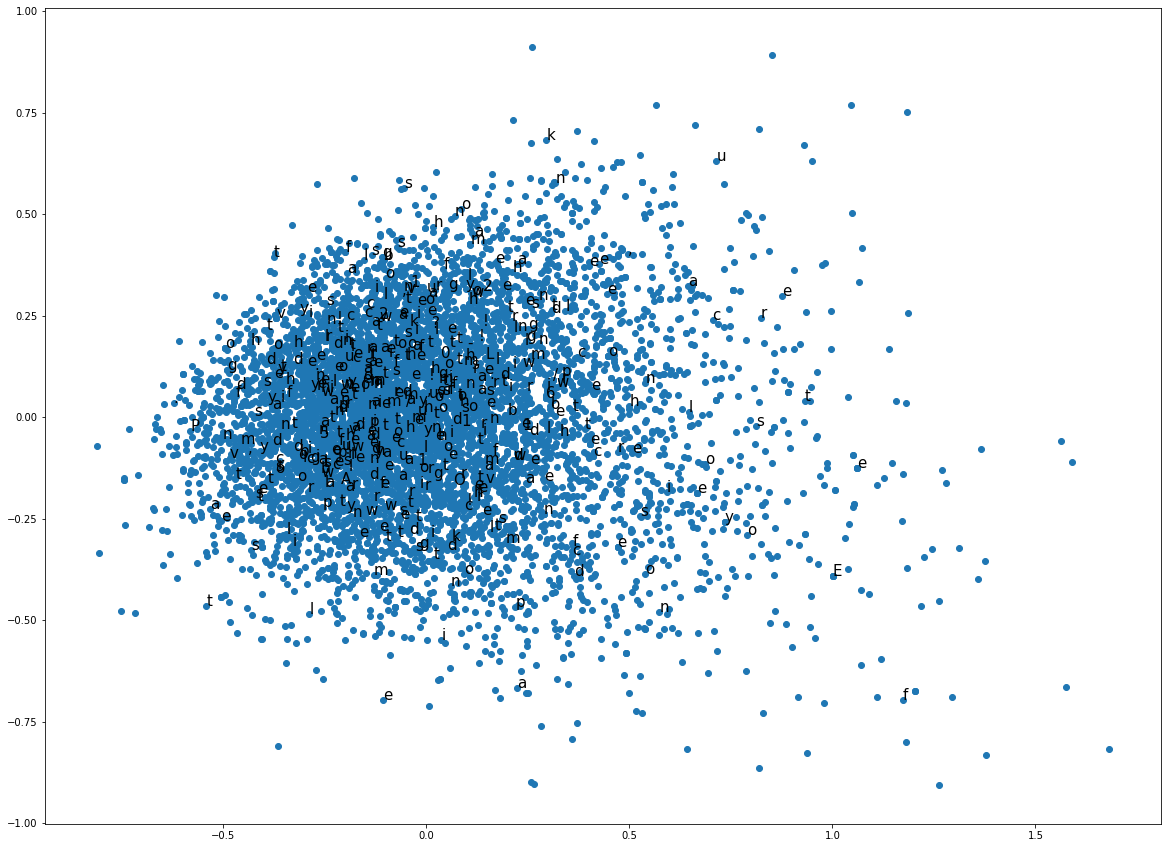

In [100]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(word, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

# DAY 3

Learning Objectives

1. Text Feature Extraction & Classification Pipelines
2. Latent Semantic Indexing
3. Word Embeddings with Spacy


In [111]:
# Create X and y
trainX = shops['full_review_text']
trainy = shops['star_rating']

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [118]:
vect = TfidfVectorizer( stop_words='english', ngram_range=(1,2))

clf = RandomForestClassifier()

#Latent Semantic Indexing
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])

# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', clf)])

# Parameters
params = { 
    'lsi__svd__n_components': (10,50),
    'lsi__vect__max_df':(.9, .95, 1.0),
    'clf__n_estimators':(5,10),
}

grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=2, verbose=1)
grid_search.fit(trainX, trainy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [119]:
grid_search.best_score_

0.5618382526543998

# Day 4

Learning Objective:

1. Estimating LDA Models with Gensim

In [126]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

def doc_stream(path):
    tokens = tokenize(str(text))
    yield tokens

In [141]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(shops['lemmas'])

In [144]:
id2word.token2id['mocha']

512

In [148]:
len(id2word.keys())

18446

In [145]:
corpus = [id2word.doc2bow(text) for text in doc_stream(shops['lemmas'])]

In [146]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [149]:
lda.print_topics()

[(0,
  '0.000*"5/1/2015" + 0.000*"3.75/12" + 0.000*"Marathon" + 0.000*"Joint" + 0.000*"break-" + 0.000*"Renegade" + 0.000*"teenager" + 0.000*"streat" + 0.000*"Y" + 0.000*"blossom"'),
 (1,
  '0.000*"5/1/2015" + 0.000*"3.75/12" + 0.000*"Marathon" + 0.000*"Joint" + 0.000*"break-" + 0.000*"Renegade" + 0.000*"teenager" + 0.000*"streat" + 0.000*"Y" + 0.000*"blossom"'),
 (2,
  '0.000*"5/1/2015" + 0.000*"3.75/12" + 0.000*"Marathon" + 0.000*"Joint" + 0.000*"break-" + 0.000*"Renegade" + 0.000*"teenager" + 0.000*"streat" + 0.000*"Y" + 0.000*"blossom"'),
 (3,
  '0.000*"5/1/2015" + 0.000*"3.75/12" + 0.000*"Marathon" + 0.000*"Joint" + 0.000*"break-" + 0.000*"Renegade" + 0.000*"teenager" + 0.000*"streat" + 0.000*"Y" + 0.000*"blossom"'),
 (4,
  '0.000*"1" + 0.000*"check" + 0.000*"love" + 0.000*"list" + 0.000*"11/25/2016" + 0.000*"1/21/2016" + 0.000*"booth" + 0.000*"stop" + 0.000*"8/2/2015" + 0.000*"atm"'),
 (5,
  '0.000*"5/1/2015" + 0.000*"3.75/12" + 0.000*"Marathon" + 0.000*"Joint" + 0.000*"break-" +

In [150]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics, start=1): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 1 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 2 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 3 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 4 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 5 ------
1 check love list 11/25/2016

------ Topic 6 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 7 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 8 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 9 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 10 ------
1 check love 11/25/2016 list

------ Topic 11 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 12 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 13 ------
1 check list 11/25/2016 Room

------ Topic 14 ------
5/1/2015 3.75/12 Marathon Joint break-

------ Topic 15 ------
5/1/2015 3.75/12 Marathon Joint break-



In [152]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [155]:
df = pd.DataFrame.from_records(new_distro)

df.columns = topics

# df['aut'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

df.head()

,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,1 check love list 11/25/2016,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,1 check love 11/25/2016 list,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-,1 check list 11/25/2016 Room,5/1/2015 3.75/12 Marathon Joint break-,5/1/2015 3.75/12 Marathon Joint break-
0,0,0,0,0,0,0,0,0,0,0.983622,0,0,0,0,0


In [158]:
df.mean()

5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
1 check love list 11/25/2016              0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
1 check love 11/25/2016 list              0.983622
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
1 check list 11/25/2016 Room              0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
5/1/2015 3.75/12 Marathon Joint break-    0.000000
dtype: float64

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [ ]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [ ]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

In [ ]:
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)